In [1]:
#!python -m pip install --user pyrsig pycno pyproj netcdf4

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import pyrsig
import xarray as xr
import pycno
import os
import numpy as np

In [3]:
#!apt-get install -y libproj-dev proj-data proj-bin libgeos-dev
#!pip install cartopy

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Intro: getting TROPOMI NO2 into dataframe

In [5]:


rsigapi = pyrsig.RsigApi(bdate='2023-09-01')
df = rsigapi.to_dataframe('tropomi.offl.no2.nitrogendioxide_tropospheric_column')
print(df.columns)
# (303444, 4) Timestamp(UTC) LONGITUDE(deg) LATITUDE(deg) nitrogendioxide_tropospheric_column(molecules/cm2)

Using cached: ./tropomi.offl.no2.nitrogendioxide_tropospheric_column_2023-09-01T000000Z_2023-09-01T235959Z.csv.gz
Index(['Timestamp(UTC)', 'LONGITUDE(deg)', 'LATITUDE(deg)',
       'nitrogendioxide_tropospheric_column(molecules/cm2)',
       'Longitude_SW(deg)', 'Longitude_SE(deg)', 'Longitude_NW(deg)',
       'Longitude_NE(deg)', 'Latitude_SW(deg)', 'Latitude_SE(deg)',
       'Latitude_NW(deg)', 'Latitude_NE(deg)'],
      dtype='object')


In [6]:

# os.makedirs('boston', exist_ok=True)


# create folder inside google drive
os.makedirs('/content/drive/My Drive/satellite_senior_project/data/boston', exist_ok=True)

# path to folder for figures
fig_dir = '/content/drive/MyDrive/satellite_senior_project/figures'

# create directory if doesnt exist
os.makedirs(fig_dir, exist_ok=True)


## Time series analysis: daily

Using cached: boston/tempo.l2.no2.vertical_column_troposphere_2024-09-09T000000Z_2024-09-09T235959Z.xdr.gz
Using cached: boston/tropomi.offl.no2.nitrogendioxide_tropospheric_column_2024-09-09T000000Z_2024-09-09T235959Z.csv.gz


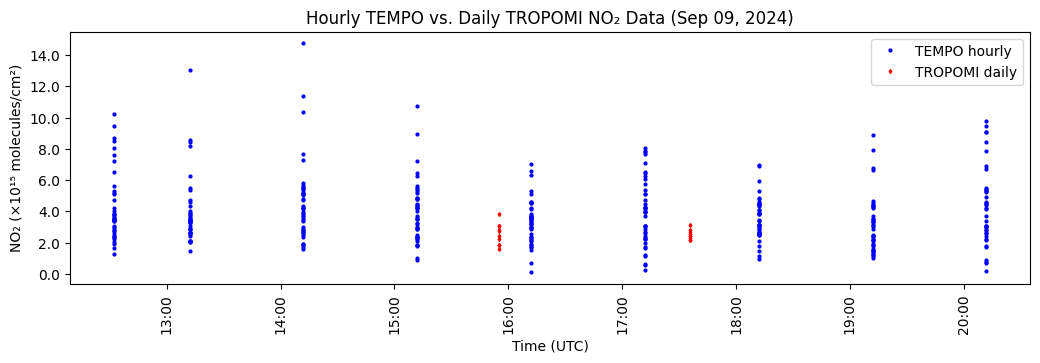

In [7]:
rsigapi = pyrsig.RsigApi(
    bdate='2024-09-09T00', edate='2024-09-09T23:59:59',
    bbox=(-71.19, 42.23, -70.9, 42.43), workdir='boston'
)

tkey = 'none'
rsigapi.tempo_kw['api_key'] = tkey

# call tempo
tempokey = 'tempo.l2.no2.vertical_column_troposphere'
tempocol = 'no2_vertical_column_troposphere'
tempodf = rsigapi.to_dataframe(
    tempokey, unit_keys=False, parse_dates=True, backend='xdr'
)

rsigapi = pyrsig.RsigApi(
    bdate='2024-09-09',
    bbox=(-71.19, 42.23, -70.9, 42.43), workdir='boston'
)

# call tropomi
tomino2df = rsigapi.to_dataframe(
    'tropomi.offl.no2.nitrogendioxide_tropospheric_column',
    unit_keys=False, parse_dates=True
)

# # format timestamps
tempodf['time'] = pd.to_datetime(tempodf['time'], utc=True)
tomino2df['time'] = pd.to_datetime(tomino2df['time'], utc=True)


# Remove timezone info for plotting (to avoid issues)
tempodf['time'] = tempodf['time'].dt.tz_localize(None)
tomino2df['time'] = tomino2df['time'].dt.tz_localize(None)

fig, ax = plt.subplots(figsize=(12, 4), gridspec_kw=dict(bottom=0.25, left=0.15, right=0.95))
ax.tick_params(axis='x', labelrotation=90)

# Plot tempo and tropomi
ax.plot(tempodf['time'], tempodf[tempocol], marker='o', markersize=2, color='b', label='TEMPO hourly', linestyle='None')
ax.plot(tomino2df['time'], tomino2df['nitrogendioxide_tropospheric_column'], marker='d', markersize=2,color='r', label='TROPOMI daily', linestyle='None')

ax.set(xlabel='Time (UTC)', ylabel='NO₂ molecules/cm$^2$', title='Hourly TEMPO vs. Daily TROPOMI NO₂ Data (Sep 09, 2024)')
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

# turn off scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e15:.1f}'))

# Updated y-axis labels
ax.set_ylabel("NO₂ (×10¹⁵ molecules/cm²)")

# Show the plot
plt.legend()
plt.show()

Using cached: boston/tempo.l2.no2.vertical_column_troposphere_2024-09-09T000000Z_2024-09-09T235959Z.xdr.gz
Using cached: boston/tropomi.offl.no2.nitrogendioxide_tropospheric_column_2024-09-09T000000Z_2024-09-09T235959Z.csv.gz


<ipython-input-8-4bd6207f31ed>:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


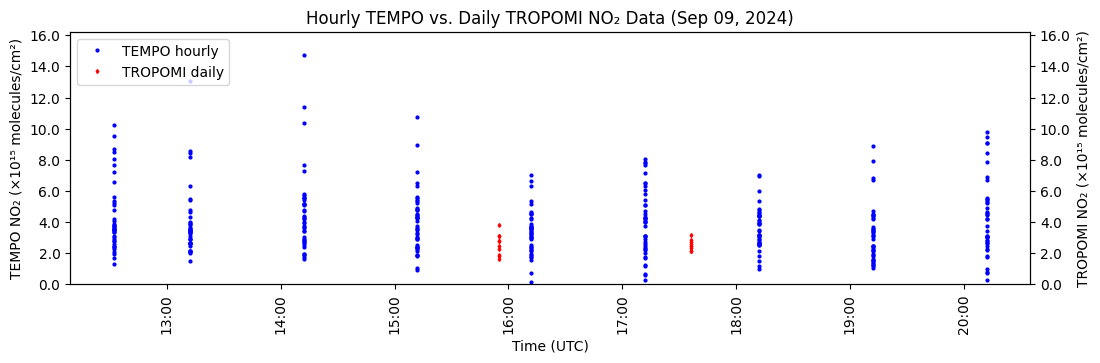

In [8]:
import pyrsig
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# fet tempo
rsigapi = pyrsig.RsigApi(
    bdate='2024-09-09T00', edate='2024-09-09T23:59:59',
    bbox=(-71.19, 42.23, -70.9, 42.43), workdir='boston'
)
tkey = 'none'
rsigapi.tempo_kw['api_key'] = tkey
tempokey = 'tempo.l2.no2.vertical_column_troposphere'
tempocol = 'no2_vertical_column_troposphere'
tempodf = rsigapi.to_dataframe(tempokey, unit_keys=False, parse_dates=True, backend='xdr')

# fetch tropomi
rsigapi = pyrsig.RsigApi(
    bdate='2024-09-09',
    bbox=(-71.19, 42.23, -70.9, 42.43), workdir='boston'
)
tomino2df = rsigapi.to_dataframe(
    'tropomi.offl.no2.nitrogendioxide_tropospheric_column',
    unit_keys=False, parse_dates=True
)

# format timestamps to avoid plotting issues
tempodf['time'] = pd.to_datetime(tempodf['time'], utc=True)
tomino2df['time'] = pd.to_datetime(tomino2df['time'], utc=True)


tempodf['time'] = tempodf['time'].dt.tz_localize(None)
tomino2df['time'] = tomino2df['time'].dt.tz_localize(None)


fig, ax = plt.subplots(figsize=(12, 4), gridspec_kw=dict(bottom=0.25, left=0.15, right=0.95))
ax.tick_params(axis='x', labelrotation=90)

# second y axis
ax2 = ax.twinx()

# tempo
tempo_line, = ax.plot(tempodf['time'], tempodf[tempocol], marker='o', markersize=2, color='b', label='TEMPO hourly', linestyle='None')

# tropomi
tropomi_line, = ax2.plot(tomino2df['time'], tomino2df['nitrogendioxide_tropospheric_column'], marker='d', markersize=2, color='r', label='TROPOMI daily', linestyle='None')


ax.set_xlabel('Time (UTC)', fontsize=10)
ax.set_ylabel('TEMPO NO₂ (×10¹⁵ molecules/cm²)', fontsize=10)
ax2.set_ylabel('TROPOMI NO₂ (×10¹⁵ molecules/cm²)', fontsize=10)
ax.set_title('Hourly TEMPO vs. Daily TROPOMI NO₂ Data (Sep 09, 2024)', fontsize=12)

# shared max for consistent scale
shared_max = max(tempodf[tempocol].max(), tomino2df['nitrogendioxide_tropospheric_column'].max())


# y limits
ax.set_ylim(0, shared_max * 1.1)
ax2.set_ylim(0, shared_max * 1.1)

# format
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

# turn off scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e15:.1f}'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e15:.1f}'))

# Show both legends
ax.legend(handles=[tempo_line, tropomi_line], loc='upper left')

fig.tight_layout()
plt.show()


In [9]:
# number of data points for each
print(len(tempodf))
print(len(tomino2df))

367
19


In [10]:
# distribution of each dataset
print(tempodf[tempocol].describe())
print(tomino2df['nitrogendioxide_tropospheric_column'].describe())


count    3.670000e+02
mean     3.920822e+15
std      2.117511e+15
min      1.019638e+14
25%      2.502754e+15
50%      3.518131e+15
75%      4.735890e+15
max      1.475622e+16
Name: no2_vertical_column_troposphere, dtype: float64
count    1.900000e+01
mean     2.531628e+15
std      5.370025e+14
min      1.574821e+15
25%      2.206834e+15
50%      2.445449e+15
75%      2.809650e+15
max      3.814561e+15
Name: nitrogendioxide_tropospheric_column, dtype: float64


In [11]:

print(tempodf['time'].nunique())
print(tomino2df['time'].nunique())

9
2


In [12]:
# os.remove('boston/tempo.l2.no2.vertical_column_troposphere_2024-09-09T000000Z_2024-09-09T235959Z.xdr.gz')
# os.remove('boston/tropomi.offl.no2.nitrogendioxide_tropospheric_column_2024-09-09T000000Z_2024-09-09T235959Z.csv.gz')

## monthly comparisons

## monthly comparison 2024-09-01 to 2024-09-30, subsetted to overpass time

In [13]:
import pyrsig
import pandas as pd


rsigapi = pyrsig.RsigApi(
    bdate='2024-09-01', edate='2024-09-30',
    bbox=(-71.19, 42.23, -70.9, 42.43), workdir='boston'
)

# fetch tropomi
tomino2df = rsigapi.to_dataframe(
    'tropomi.offl.no2.nitrogendioxide_tropospheric_column',
    unit_keys=False, parse_dates=True
)



# fetch tempo
bdates = pd.date_range('2024-09-01', '2024-09-30')

rsigapi = pyrsig.RsigApi(
  bbox=(-71.19, 42.23, -70.9, 42.43), workdir='boston'
)

tkey = 'none'
rsigapi.tempo_kw['api_key'] = tkey
tempodfs = []
for bdate in bdates:
  edate = bdate + pd.to_timedelta('86388s')
  tempodf = rsigapi.to_dataframe(
    'tempo.l2.no2.vertical_column_troposphere', bdate=bdate, edate=edate,
    unit_keys=False, parse_dates=True, verbose=9
  )
  tempodfs.append(tempodf)

tempodf = pd.concat(tempodfs)

Using cached: boston/tropomi.offl.no2.nitrogendioxide_tropospheric_column_2024-09-01T000000Z_2024-09-30T000000Z.csv.gz
https://ofmpub.epa.gov/rsig/rsigserver?SERVICE=wcs&VERSION=1.0.0&REQUEST=GetCoverage&FORMAT=ascii&TIME=2024-09-01T00:00:00Z/2024-09-01T23:59:48Z&BBOX=-71.19,42.23,-70.9,42.43&COVERAGE=tempo.l2.no2.vertical_column_troposphere&COMPRESS=1&MAXIMUM_CLOUD_FRACTION=1.0&MINIMUM_QUALITY=normal&KEY=none&MAXIMUM_SOLAR_ZENITH_ANGLE=70.0&CORNERS=1
Using cached: boston/tempo.l2.no2.vertical_column_troposphere_2024-09-01T000000Z_2024-09-01T235948Z.csv.gz
https://ofmpub.epa.gov/rsig/rsigserver?SERVICE=wcs&VERSION=1.0.0&REQUEST=GetCoverage&FORMAT=ascii&TIME=2024-09-02T00:00:00Z/2024-09-02T23:59:48Z&BBOX=-71.19,42.23,-70.9,42.43&COVERAGE=tempo.l2.no2.vertical_column_troposphere&COMPRESS=1&MAXIMUM_CLOUD_FRACTION=1.0&MINIMUM_QUALITY=normal&KEY=none&MAXIMUM_SOLAR_ZENITH_ANGLE=70.0&CORNERS=1
Using cached: boston/tempo.l2.no2.vertical_column_troposphere_2024-09-02T000000Z_2024-09-02T235948Z.

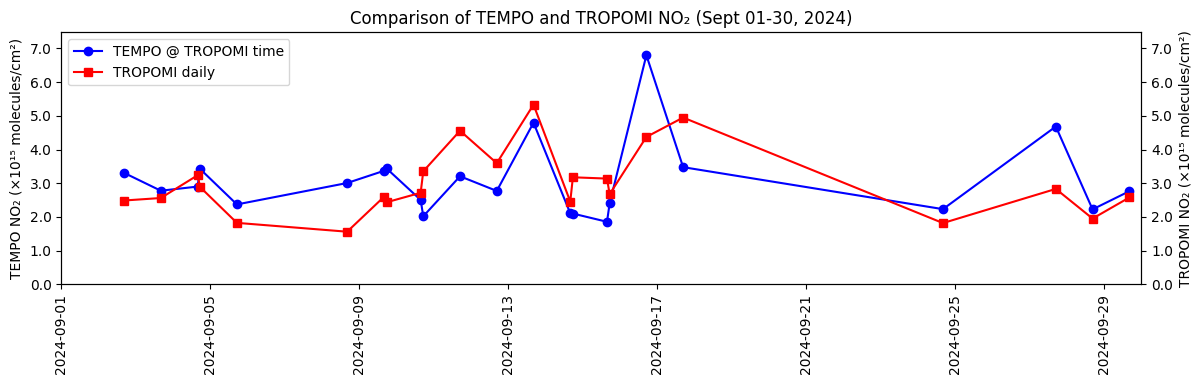

In [14]:


# create spatial medians
tempods = tempodf.groupby(pd.Grouper(key='time', freq='1h')).median(numeric_only=True)[
    'no2_vertical_column_troposphere'
]
tomids = (
    tomino2df.groupby('time').median(numeric_only=True)['nitrogendioxide_tropospheric_column']
)

# subset tempo to align with tropomi
matched_tempo = []
for t_time in tomids.dropna().index:
    closest_idx = tempods.index.get_indexer([t_time], method='nearest')[0]
    closest_time = tempods.index[closest_idx]
    matched_tempo.append(tempods.loc[closest_time])

otempo = pd.Series(matched_tempo, index=tomids.dropna().index)



# shared x
fig, ax = plt.subplots(figsize=(12, 4),
                       gridspec_kw=dict(bottom=0.25, left=0.05, right=0.95))
ax.tick_params(axis='x', labelrotation=90)
tax = ax.twinx()

# plotting
line1, = ax.plot(otempo.index.values, otempo.values, marker='o', linestyle='-', color='b', label='TEMPO @ TROPOMI time')
line2, = tax.plot(tomids.index.values, tomids.values, marker='s', color='r', label='TROPOMI daily')

# merging legends
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = tax.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='upper left')

# get shared max
shared_max = max(otempo.max(), tomids.max())


# same y limits
ax.set_ylim(0, shared_max * 1.1)
tax.set_ylim(0, shared_max * 1.1)

ax.set_xlim(pd.Timestamp("2024-09-01"), pd.Timestamp("2024-09-30"))

# Show a tick every 3 days
locator = mdates.DayLocator(interval=3)

# # Format the tick labels (e.g., "Sep 05")
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


# turn off scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e15:.1f}'))
tax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e15:.1f}'))


ax.set_ylabel("TEMPO NO₂ (×10¹⁵ molecules/cm²)")
tax.set_ylabel("TROPOMI NO₂ (×10¹⁵ molecules/cm²)")

ax.set_title("Comparison of TEMPO and TROPOMI NO₂ (Sept 01-30, 2024)")

plt.show()
# Or save out figure

## statistical analysis: monthly

In [15]:
# create df and drop nas
df = pd.concat([tomids, otempo], axis=1)
df.columns = ['TROPOMI', 'TEMPO']
df = df.dropna()

tropomi = df['TROPOMI']
tempo = df['TEMPO']


# 1. mean absolute error
mae = np.mean(np.abs(tempo - tropomi))

# 2. root mean square error
rmse = np.sqrt(np.mean((tempo-tropomi)**2))

print(f"Mean Absolute Discrepancy: {mae:.2e} molecules/cm²")
print(f"Root Mean Square Discrepancy: {rmse:.2e} molecules/cm²")


Mean Absolute Discrepancy: 8.50e+14 molecules/cm²
Root Mean Square Discrepancy: 1.03e+15 molecules/cm²


### choosing best week to analyze: based off available TROPOMI data (due to cleaning)

In [16]:
# checking best TROPOMI days for analysis

rsigapi = pyrsig.RsigApi(
    bdate='2024-09-01', edate='2024-09-30',
    bbox=(-71.19, 42.23, -70.9, 42.43), workdir='boston'
)

# get tropomi
tomino2df = rsigapi.to_dataframe(
    'tropomi.offl.no2.nitrogendioxide_tropospheric_column',
    unit_keys=False, parse_dates=True
)

tomids = (
    tomino2df.groupby('time').median(numeric_only=True)['nitrogendioxide_tropospheric_column']
)


# drop any TROPOMI days with missing values
valid_tropomi = tomids.dropna()
print(valid_tropomi.index.date)

Using cached: boston/tropomi.offl.no2.nitrogendioxide_tropospheric_column_2024-09-01T000000Z_2024-09-30T000000Z.csv.gz
[datetime.date(2024, 9, 2) datetime.date(2024, 9, 3)
 datetime.date(2024, 9, 4) datetime.date(2024, 9, 4)
 datetime.date(2024, 9, 5) datetime.date(2024, 9, 8)
 datetime.date(2024, 9, 9) datetime.date(2024, 9, 9)
 datetime.date(2024, 9, 10) datetime.date(2024, 9, 10)
 datetime.date(2024, 9, 11) datetime.date(2024, 9, 12)
 datetime.date(2024, 9, 13) datetime.date(2024, 9, 14)
 datetime.date(2024, 9, 14) datetime.date(2024, 9, 15)
 datetime.date(2024, 9, 15) datetime.date(2024, 9, 16)
 datetime.date(2024, 9, 17) datetime.date(2024, 9, 24)
 datetime.date(2024, 9, 27) datetime.date(2024, 9, 28)
 datetime.date(2024, 9, 29)]


## weekly comparison with subsetting to overpass times: 2024-09-09 to 2024-09-15

In [17]:
import pyrsig
import pandas as pd


rsigapi = pyrsig.RsigApi(
    bdate='2024-09-09', edate='2024-09-15',
    bbox=(-71.19, 42.23, -70.9, 42.43), workdir='boston'
)

# get tropomi
tomino2df = rsigapi.to_dataframe(
    'tropomi.offl.no2.nitrogendioxide_tropospheric_column',
    unit_keys=False, parse_dates=True
)



# get tempo NO2
bdates = pd.date_range('2024-09-09', '2024-09-15')

rsigapi = pyrsig.RsigApi(
  bbox=(-71.19, 42.23, -70.9, 42.43), workdir='boston'
)

tkey = 'none'
rsigapi.tempo_kw['api_key'] = tkey
tempodfs = []
for bdate in bdates:
  edate = bdate + pd.to_timedelta('86388s')
  tempodf = rsigapi.to_dataframe(
    'tempo.l2.no2.vertical_column_troposphere', bdate=bdate, edate=edate,
    unit_keys=False, parse_dates=True, verbose=9
  )
  tempodfs.append(tempodf)

tempodf = pd.concat(tempodfs)

Using cached: boston/tropomi.offl.no2.nitrogendioxide_tropospheric_column_2024-09-09T000000Z_2024-09-15T000000Z.csv.gz
https://ofmpub.epa.gov/rsig/rsigserver?SERVICE=wcs&VERSION=1.0.0&REQUEST=GetCoverage&FORMAT=ascii&TIME=2024-09-09T00:00:00Z/2024-09-09T23:59:48Z&BBOX=-71.19,42.23,-70.9,42.43&COVERAGE=tempo.l2.no2.vertical_column_troposphere&COMPRESS=1&MAXIMUM_CLOUD_FRACTION=1.0&MINIMUM_QUALITY=normal&KEY=none&MAXIMUM_SOLAR_ZENITH_ANGLE=70.0&CORNERS=1
Using cached: boston/tempo.l2.no2.vertical_column_troposphere_2024-09-09T000000Z_2024-09-09T235948Z.csv.gz
https://ofmpub.epa.gov/rsig/rsigserver?SERVICE=wcs&VERSION=1.0.0&REQUEST=GetCoverage&FORMAT=ascii&TIME=2024-09-10T00:00:00Z/2024-09-10T23:59:48Z&BBOX=-71.19,42.23,-70.9,42.43&COVERAGE=tempo.l2.no2.vertical_column_troposphere&COMPRESS=1&MAXIMUM_CLOUD_FRACTION=1.0&MINIMUM_QUALITY=normal&KEY=none&MAXIMUM_SOLAR_ZENITH_ANGLE=70.0&CORNERS=1
Using cached: boston/tempo.l2.no2.vertical_column_troposphere_2024-09-10T000000Z_2024-09-10T235948Z.

Using cached: boston/tropomi.offl.no2.nitrogendioxide_tropospheric_column_2024-09-09T000000Z_2024-09-15T000000Z.csv.gz
https://ofmpub.epa.gov/rsig/rsigserver?SERVICE=wcs&VERSION=1.0.0&REQUEST=GetCoverage&FORMAT=ascii&TIME=2024-09-09T00:00:00Z/2024-09-09T23:59:48Z&BBOX=-71.19,42.23,-70.9,42.43&COVERAGE=tempo.l2.no2.vertical_column_troposphere&COMPRESS=1&MAXIMUM_CLOUD_FRACTION=1.0&MINIMUM_QUALITY=normal&KEY=none&MAXIMUM_SOLAR_ZENITH_ANGLE=70.0&CORNERS=1
Using cached: boston/tempo.l2.no2.vertical_column_troposphere_2024-09-09T000000Z_2024-09-09T235948Z.csv.gz
https://ofmpub.epa.gov/rsig/rsigserver?SERVICE=wcs&VERSION=1.0.0&REQUEST=GetCoverage&FORMAT=ascii&TIME=2024-09-10T00:00:00Z/2024-09-10T23:59:48Z&BBOX=-71.19,42.23,-70.9,42.43&COVERAGE=tempo.l2.no2.vertical_column_troposphere&COMPRESS=1&MAXIMUM_CLOUD_FRACTION=1.0&MINIMUM_QUALITY=normal&KEY=none&MAXIMUM_SOLAR_ZENITH_ANGLE=70.0&CORNERS=1
Using cached: boston/tempo.l2.no2.vertical_column_troposphere_2024-09-10T000000Z_2024-09-10T235948Z.

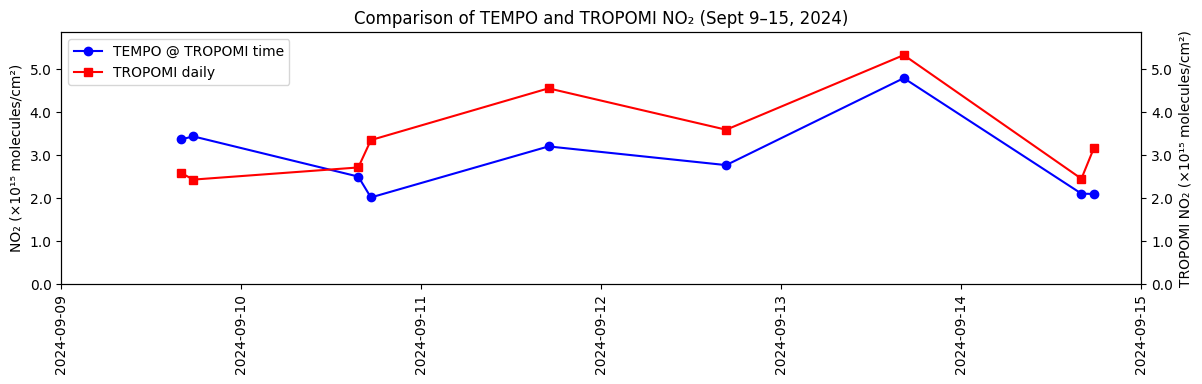

In [18]:
import pyrsig
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os


rsigapi = pyrsig.RsigApi(
    bdate='2024-09-09', edate='2024-09-15',
    bbox=(-71.19, 42.23, -70.9, 42.43), workdir='boston'
)

# get tropomi
tomino2df = rsigapi.to_dataframe(
    'tropomi.offl.no2.nitrogendioxide_tropospheric_column',
    unit_keys=False, parse_dates=True
)



# get tempo NO2
bdates = pd.date_range('2024-09-09', '2024-09-15')

rsigapi = pyrsig.RsigApi(
  bbox=(-71.19, 42.23, -70.9, 42.43), workdir='boston'
)

tkey = 'none'
rsigapi.tempo_kw['api_key'] = tkey
tempodfs = []
for bdate in bdates:
  edate = bdate + pd.to_timedelta('86388s')
  tempodf = rsigapi.to_dataframe(
    'tempo.l2.no2.vertical_column_troposphere', bdate=bdate, edate=edate,
    unit_keys=False, parse_dates=True, verbose=9
  )
  tempodfs.append(tempodf)

tempodf = pd.concat(tempodfs)

# spatial medians
tempods = tempodf.groupby(pd.Grouper(key='time', freq='1h')).median(numeric_only=True)[
    'no2_vertical_column_troposphere'
]
tomids = (
    tomino2df.groupby('time').median(numeric_only=True)['nitrogendioxide_tropospheric_column']
)


# match tempo to tropomi overpass times
matched_tempo = []
matched_tropomi = []

for t_time in tomids.dropna().index:
    closest_idx = tempods.index.get_indexer([t_time], method='nearest')[0]
    closest_time = tempods.index[closest_idx]
    matched_tempo.append(tempods.loc[closest_time])
    matched_tropomi.append(tomids.loc[t_time])

otempo = pd.Series(matched_tempo, index=tomids.dropna().index)
tomids = pd.Series(matched_tropomi, index=tomids.dropna().index)


fig, ax = plt.subplots(figsize=(12, 4),
                       gridspec_kw=dict(bottom=0.25, left=0.05, right=0.95))
ax.tick_params(axis='x', labelrotation=90)
tax = ax.twinx()

line1, = ax.plot(otempo.index.values, otempo.values, marker='o', linestyle='-', color='b', label='TEMPO @ TROPOMI time')
line2, = tax.plot(tomids.index.values, tomids.values, marker='s', color='r', label='TROPOMI daily')

handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = tax.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='upper left')

# shared max
shared_max = max(otempo.max(), tomids.max())


# same y limits
ax.set_ylim(0, shared_max * 1.1)
tax.set_ylim(0, shared_max * 1.1)

ax.set_xlim(pd.Timestamp("2024-09-09"), pd.Timestamp("2024-09-15"))

locator = mdates.DayLocator(interval=3)

# turn off scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e15:.1f}'))
tax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e15:.1f}'))

ax.set_ylabel("NO₂ (×10¹⁵ molecules/cm²)")
tax.set_ylabel("TROPOMI NO₂ (×10¹⁵ molecules/cm²)")

ax.set_title("Comparison of TEMPO and TROPOMI NO₂ (Sept 9–15, 2024)")
plt.show()

# fig.savefig(os.path.join(fig_dir, 'weekly_no2_timeseries.png'))

## statistical analyses

In [19]:
# create df and drop nas
df = pd.concat([tomids, otempo], axis=1)
df.columns = ['TROPOMI', 'TEMPO']
df = df.dropna()


In [20]:
import numpy as np

tropomi = df['TROPOMI']
tempo = df['TEMPO']


# 1. mean absolute error
mae = np.mean(np.abs(tempo - tropomi))

# 2. root mean square error
rmse = np.sqrt(np.mean((tempo-tropomi)**2))

print(f"Mean Absolute Discrepancy: {mae:.2e} molecules/cm²")
print(f"Root Mean Square Discrepancy: {rmse:.2e} molecules/cm²")

Mean Absolute Discrepancy: 8.29e+14 molecules/cm²
Root Mean Square Discrepancy: 9.14e+14 molecules/cm²


MAE easier to interpret
RMSE sensitive to outliers
we will go with MAE

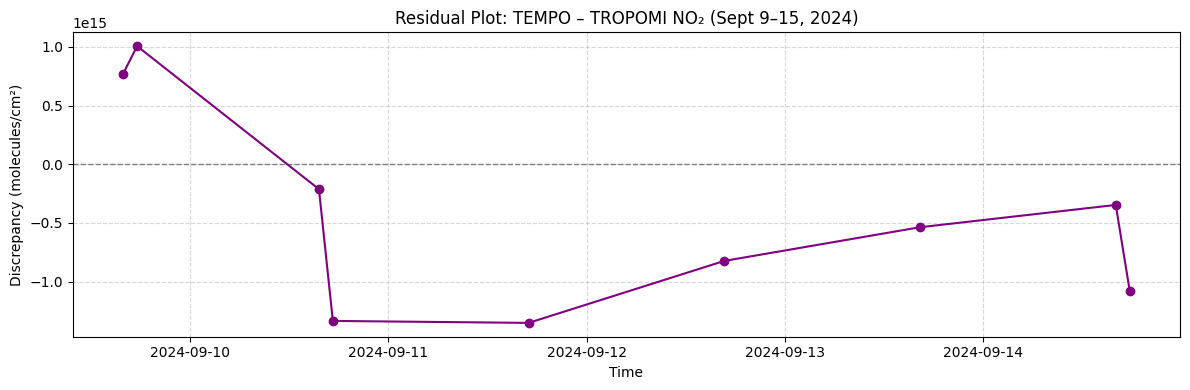

In [21]:
## residual plot

# Calculate residuals (TEMPO - TROPOMI)
residuals = tempo - tropomi

plt.figure(figsize=(12, 4))
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # baseline of perfect agreement
plt.plot(residuals.index, residuals.values, marker='o', linestyle='-', color='purple')
plt.title("Residual Plot: TEMPO – TROPOMI NO₂ (Sept 9–15, 2024)")
plt.xlabel("Time")
plt.ylabel("Discrepancy (molecules/cm²)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

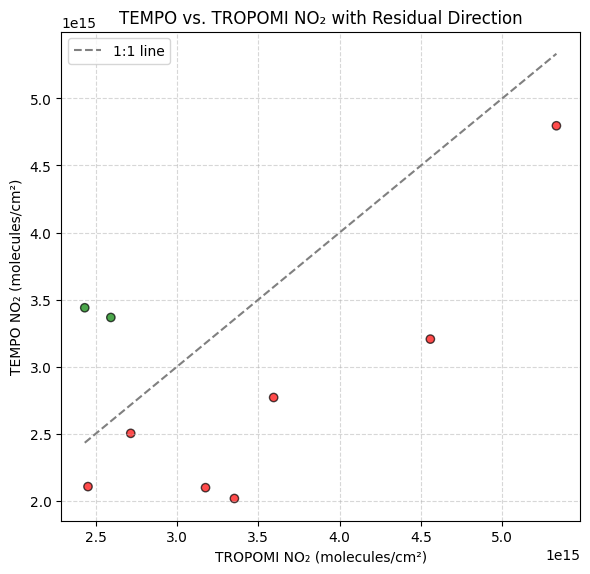

In [22]:
## scatter plot

import matplotlib.cm as cm
import numpy as np

# residuals
residuals = tempo - tropomi

# create color labels: green if TEMPO > TROPOMI, red if not
colors = ['green' if res > 0 else 'red' for res in residuals]

plt.figure(figsize=(6, 6))
plt.scatter(tropomi, tempo, c=colors, edgecolor='k', alpha=0.7)

# 1:1 reference line
plt.plot([tropomi.min(), tropomi.max()],
         [tropomi.min(), tropomi.max()],
         linestyle='--', color='gray', label='1:1 line')

plt.xlabel("TROPOMI NO₂ (molecules/cm²)")
plt.ylabel("TEMPO NO₂ (molecules/cm²)")
plt.title("TEMPO vs. TROPOMI NO₂ with Residual Direction")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Spatial Comparisons

## 1. TROPOMI: Regional look on 4km grid of CONUS, but only downloaded monthly data (September 2024) over specified regional area.

2024-09-01 00:00:00
2024-09-02 00:00:00
2024-09-03 00:00:00
2024-09-04 00:00:00
2024-09-05 00:00:00
2024-09-06 00:00:00
2024-09-07 00:00:00
2024-09-08 00:00:00
2024-09-09 00:00:00
2024-09-10 00:00:00
2024-09-11 00:00:00
2024-09-12 00:00:00
2024-09-13 00:00:00
2024-09-14 00:00:00
2024-09-15 00:00:00
2024-09-16 00:00:00
2024-09-17 00:00:00
2024-09-18 00:00:00
2024-09-19 00:00:00
2024-09-20 00:00:00
2024-09-21 00:00:00
2024-09-22 00:00:00
2024-09-23 00:00:00
2024-09-24 00:00:00
2024-09-25 00:00:00
2024-09-26 00:00:00
2024-09-27 00:00:00
2024-09-28 00:00:00
2024-09-29 00:00:00
2024-09-30 00:00:00


/root/.local/lib/python3.11/site-packages/pycno/__init__.py:538: UserWarning: Downloading: https://www.giss.nasa.gov/tools/panoply/overlays/MWDB_Coasts_NA_3.cnob to /root/.pycno/MWDB_Coasts_NA_3.cnob
  warnings.warn('Downloading: ' + url + ' to ' + str(datapatho))


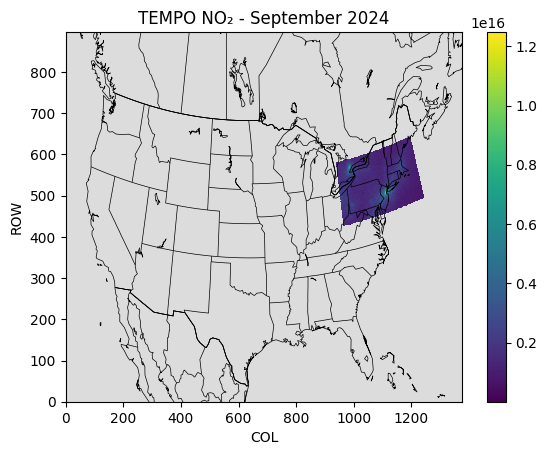

In [23]:

gdnam = '4US1'
bdate = '2024-09-01'
edate = '2024-09-30'
wdir = f'{gdnam}/{bdate[:4]}'

# working directory
os.makedirs(gdnam, exist_ok=True)

rsigapi = pyrsig.RsigApi(
    bdate=bdate, bbox=(-81.77,38.87,-68.49,44.42),
    encoding={"zlib": True, "complevel": 1, "_FillValue": -9.999e36},
    workdir=wdir, grid_kw=gdnam
)

# update to download daily avg in case
rsigapi.grid_kw['REGRID_AGGREGATE'] = 'daily'

# loop over days
dss_tropomi = []
for bdate in pd.date_range(bdate, edate):
    print(bdate)
    try:
        ds = rsigapi.to_ioapi(key='tropomi.offl.no2.nitrogendioxide_tropospheric_column', bdate=bdate)
        dss_tropomi.append(ds)
    except Exception as e:
        print(e)


# create simple long term average
outds = dss_tropomi[0][['DAILY_NO2', 'COUNT']].isel(TSTEP=0, LAY=0)
outds['DAILY_NO2'] = outds['DAILY_NO2'].fillna(0) * outds['COUNT']
for ds in dss_tropomi[1:]:
    ds = ds.isel(TSTEP=0, LAY=0)
    outds['DAILY_NO2'] += ds['DAILY_NO2'].fillna(0) * ds['COUNT']
    outds['COUNT'] += ds['COUNT']

Z = outds['DAILY_NO2'] = (outds['DAILY_NO2'] / outds['COUNT'])

# plot with state boundaries
qm = Z.plot()
qm.axes.set(facecolor='gainsboro')
pycno.cno(dss_tropomi[0].attrs['crs_proj4']).drawstates(ax=qm.axes)
plt.title("TEMPO NO₂ - September 2024")

# Show the figure
plt.show()
# # Or save the figure

## 2. TROPOMI: Daily Data (September 9, 2024) over specified regional area.

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 1538953112902600 of field no2_trop of feature 12482 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 697763939991709.75 of field no2_trop of feature 12483 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 3353718790808416 of field no2_trop of feature 12484 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 2016346596164767 of field no2_trop of feature 12485 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/lo

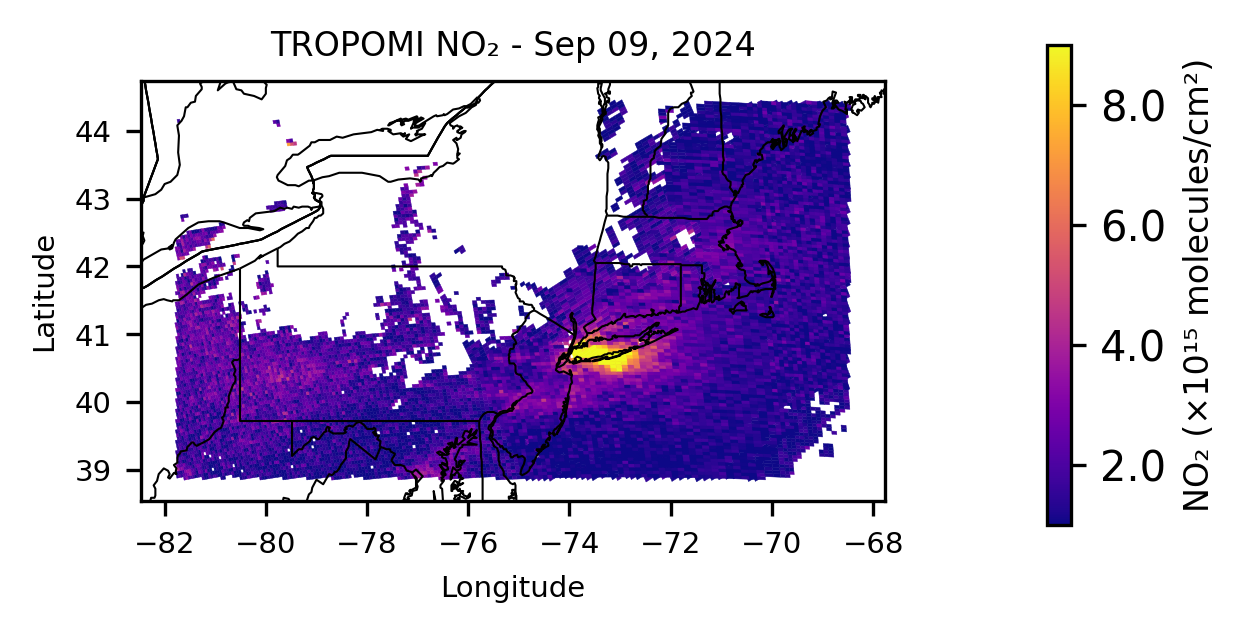

In [24]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import polygons
import pyrsig
import pycno
import matplotlib.ticker as ticker

coordkeys = [
    'Longitude_SW(deg)', 'Latitude_SW(deg)',
    'Longitude_SE(deg)', 'Latitude_SE(deg)',
    'Longitude_NE(deg)', 'Latitude_NE(deg)',
    'Longitude_NW(deg)', 'Latitude_NW(deg)',
    'Longitude_SW(deg)', 'Latitude_SW(deg)',
]

cno = pycno.cno()

# fetch data
datakey = "tropomi.offl.no2.nitrogendioxide_tropospheric_column"
bdate = "2024-09-09"
bbox = (-81.77,38.87,-68.49,44.42)
api = pyrsig.RsigApi(bbox=bbox)
# xdr is faster
tropdf = api.to_dataframe(datakey, bdate=bdate, backend='xdr')
geom = polygons(tropdf[coordkeys].values.reshape(-1, 5, 2))
gtropdf = gpd.GeoDataFrame(
    tropdf.drop(columns=coordkeys), geometry=geom, crs=4326
)
vmin = 1e15
vmax = 9e15

# plot
col = 'nitrogendioxide_tropospheric_column(molecules/cm2)'
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
gtropdf.plot(col, edgecolor="face", linewidth=0.1, legend=True, ax=ax, vmin=vmin, vmax=vmax, cmap='plasma')

cbar_ax = fig.axes[1]  # second axis is the colorbar
cbar_ax.set_ylabel("NO₂ (×10¹⁵ molecules/cm²)", fontsize=8)
cbar_ax.set_position([0.88, 0.3, 0.02, 0.4])
cbar_ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e15:.1f}'))

cno.drawstates(ax=ax, resnum=1)
fig.savefig(f'{datakey}_{bdate}.png')


plt.title("TROPOMI NO₂ - Sep 09, 2024", fontsize=8)
plt.xlabel("Longitude", fontsize=7)
plt.ylabel("Latitude", fontsize=7)
ax.tick_params(labelsize=7)
# save as gis format
gtropdf.to_file(f'{datakey}_{bdate}.geojson')
# shapefiles like shorter names
gtropdf.rename(columns={
    'Timestamp(UTC)': 'time_utc',
    'LATITUDE(deg)': 'lat_center',
    'LONGITUDE(deg)': 'lon_center',
    col: 'no2_trop',
}).to_file(f'{datakey}_{bdate}.shp')

In [25]:
## tropomi df dimensions

print(tropdf.shape)

# unique time stamps
print(tropdf['Timestamp(UTC)'].unique())


(14982, 12)
['2024-09-09T15:55:00+0000' '2024-09-09T17:36:00+0000']


## gif: spatial weekly september 9 - 15, 2024

Using cached: ./tropomi.offl.no2.nitrogendioxide_tropospheric_column_2024-09-09T000000Z_2024-09-09T235959Z.xdr.gz


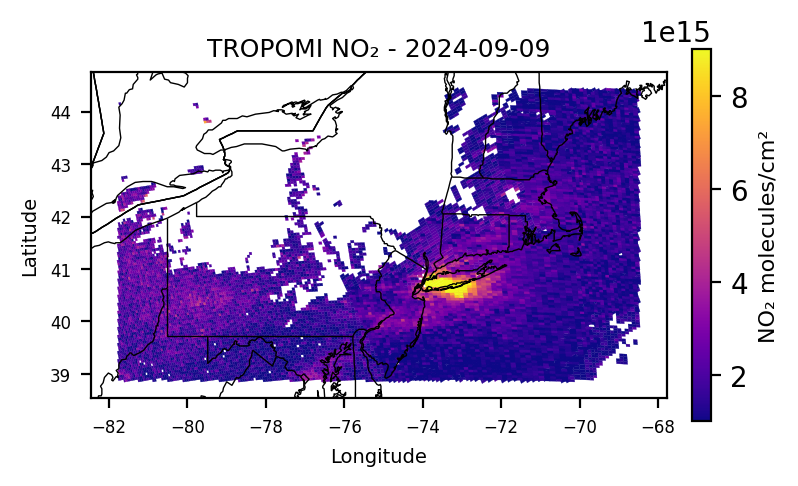

In [26]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import polygons
import pyrsig
import pycno
import matplotlib.animation as animation
import pandas as pd

# set up
coordkeys = [
    'Longitude_SW(deg)', 'Latitude_SW(deg)',
    'Longitude_SE(deg)', 'Latitude_SE(deg)',
    'Longitude_NE(deg)', 'Latitude_NE(deg)',
    'Longitude_NW(deg)', 'Latitude_NW(deg)',
    'Longitude_SW(deg)', 'Latitude_SW(deg)',
]
bbox = (-81.77, 38.87, -68.49, 44.42)
datakey = "tropomi.offl.no2.nitrogendioxide_tropospheric_column"
dates = pd.date_range("2024-09-09", "2024-09-15")
col = 'nitrogendioxide_tropospheric_column(molecules/cm2)'
vmin = 1e15
vmax = 9e15
cno = pycno.cno()

# preload shapefiles
geo_dfs = []
for date in dates:
    api = pyrsig.RsigApi(bbox=bbox)
    df = api.to_dataframe(datakey, bdate=date.strftime('%Y-%m-%d'), backend='xdr')
    geom = polygons(df[coordkeys].values.reshape(-1, 5, 2))
    gdf = gpd.GeoDataFrame(df.drop(columns=coordkeys), geometry=geom, crs=4326)
    geo_dfs.append((date.strftime('%Y-%m-%d'), gdf))

# plot
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin, vmax))
cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label("NO₂ molecules/cm²", fontsize=8)

# creating gif
def update(frame):
    ax.clear()
    date_str, gdf = geo_dfs[frame]
    gdf.plot(
        col, cmap='plasma', edgecolor="face", linewidth=0.1,
        ax=ax, vmin=vmin, vmax=vmax
    )
    cno.drawstates(ax=ax, resnum=1)
    ax.set_title(f"TROPOMI NO₂ - {date_str}", fontsize=9)
    ax.set_xlabel("Longitude", fontsize=7)
    ax.set_ylabel("Latitude", fontsize=7)
    ax.tick_params(labelsize=6)

ani = animation.FuncAnimation(fig, update, frames=len(geo_dfs), repeat=True)
ani.save("tropomi_timelapse.gif", writer="pillow", fps=1)


In [27]:
from google.colab import files
files.download("tropomi_timelapse.gif")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 4. TEMPO: Daily data over specified regional area

https://ofmpub.epa.gov/rsig/rsigserver?SERVICE=wcs&VERSION=1.0.0&REQUEST=GetCoverage&FORMAT=xdr&TIME=2024-09-09T00:00:00Z/2024-09-09T23:59:59Z&BBOX=-81.77,38.87,-68.49,44.42&COVERAGE=tempo.l2.no2.vertical_column_troposphere&COMPRESS=1&MAXIMUM_CLOUD_FRACTION=1.0&MINIMUM_QUALITY=normal&KEY=none&MAXIMUM_SOLAR_ZENITH_ANGLE=70.0&CORNERS=1
Calling RSIG ./tempo.l2.no2.vertical_column_troposphere_2024-09-09T000000Z_2024-09-09T235959Z.xdr.gz 
Retrieving ..........................


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 2118354119209772.75 of field no2_trop of feature 462587 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 1661221774357566.5 of field no2_trop of feature 462588 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 1195761681518084.25 of field no2_trop of feature 462589 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 2488653915768355 of field no2_trop of feature 462590 not successfully written. Possibly due to too larger number with respect to field width
  ogr_writ

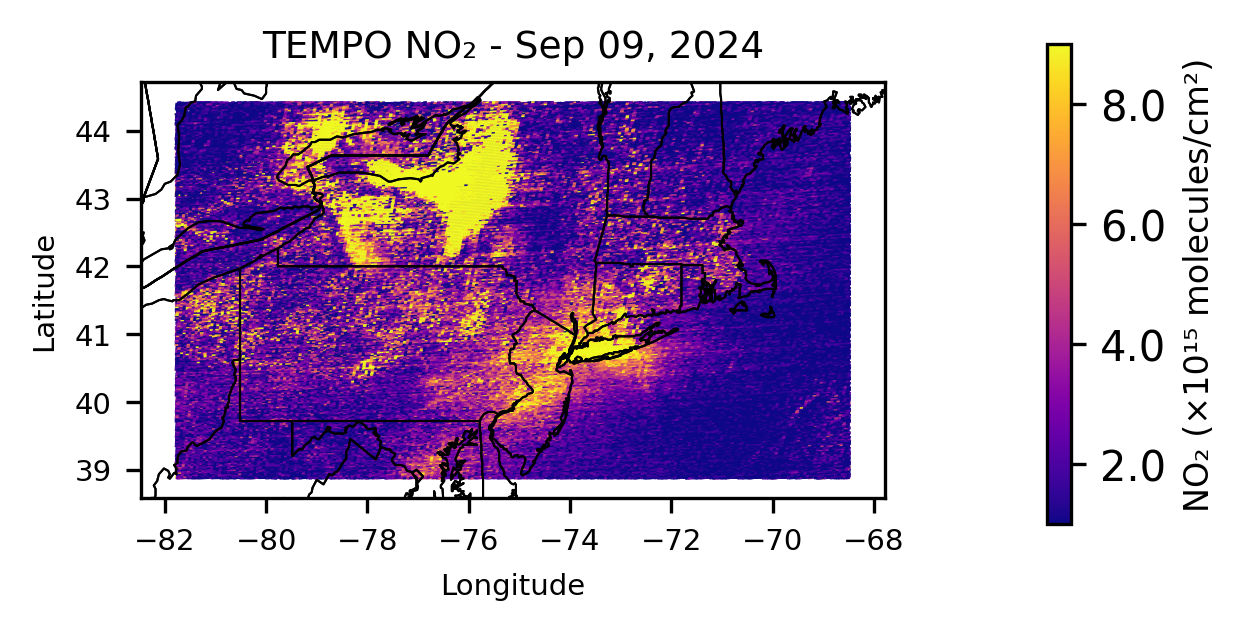

In [28]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import polygons
import pyrsig
import pycno
import pandas as pd


coordkeys = [
    'Longitude_SW', 'Latitude_SW',
    'Longitude_SE', 'Latitude_SE',
    'Longitude_NE', 'Latitude_NE',
    'Longitude_NW', 'Latitude_NW',
    'Longitude_SW', 'Latitude_SW',
]

cno = pycno.cno()


# fetch tempo NO2
datakey = "tempo.l2.no2.vertical_column_troposphere"
# bdate = ('2024-09-09T00')
bdate = pd.to_datetime("2024-09-09")
rsigapi = pyrsig.RsigApi(
  bbox=(-81.77,38.87,-68.49,44.42))
tkey = 'none'
rsigapi.tempo_kw['api_key'] = tkey
tempodf = rsigapi.to_dataframe(
    'tempo.l2.no2.vertical_column_troposphere', bdate=bdate,
     unit_keys=False, parse_dates=True, verbose=9, backend='xdr')

# create
geom = polygons(tempodf[coordkeys].values.reshape(-1, 5, 2))
gtempodf = gpd.GeoDataFrame(
    tempodf.drop(columns=coordkeys), geometry=geom, crs=4326
)

# gtempodf
vmin = 1e15
vmax = 9e15

# plot
# col = 'nitrogendioxide_tropospheric_column(molecules/cm2)'
col = 'no2_vertical_column_troposphere'
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
gtempodf.plot(col, edgecolor="face", linewidth=0.1, legend=True, ax=ax, vmin=vmin, vmax=vmax, cmap='plasma')
# Label the colorbar
cbar_ax = fig.axes[1]  # Second axis is the colorbar
cbar_ax.set_ylabel("NO₂ (×10¹⁵ molecules/cm²)", fontsize=8)
# Shrink the colorbar by adjusting its position [left, bottom, width, height]
cbar_ax.set_position([0.88, 0.3, 0.02, 0.4])
cbar_ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e15:.1f}'))
cno.drawstates(ax=ax, resnum=1)
fig.savefig(f'{datakey}_{bdate}.png')
plt.title("TEMPO NO₂ - Sep 09, 2024", fontsize=9)
plt.xlabel("Longitude", fontsize=7)
plt.ylabel("Latitude", fontsize=7)
ax.tick_params(labelsize=7)
cno.drawstates(ax=ax, resnum=1)
fig.savefig(f'{datakey}_{bdate}.png')

# save as gis format
gtempodf.to_file(f'{datakey}_{bdate}.geojson')
# Rename long columns for shapefile export
gtempodf.rename(columns={
    'Timestamp': 'time_utc',
    'LATITUDE': 'lat_center',
    'LONGITUDE': 'lon_center',
    col: 'no2_trop',
}).to_file(f'{datakey}_{bdate}.shp')

In [29]:
### tempo df dimensions:

print(tempodf.shape)


# unique timestamps
print(tempodf['Timestamp'].unique())

(465087, 13)
['2024-09-09T12:32:00+0000' '2024-09-09T12:38:00+0000'
 '2024-09-09T13:12:00+0000' '2024-09-09T13:18:00+0000'
 '2024-09-09T13:25:00+0000' '2024-09-09T14:12:00+0000'
 '2024-09-09T14:18:00+0000' '2024-09-09T14:25:00+0000'
 '2024-09-09T15:12:00+0000' '2024-09-09T15:18:00+0000'
 '2024-09-09T15:25:00+0000' '2024-09-09T16:12:00+0000'
 '2024-09-09T16:18:00+0000' '2024-09-09T16:25:00+0000'
 '2024-09-09T17:12:00+0000' '2024-09-09T17:18:00+0000'
 '2024-09-09T17:25:00+0000' '2024-09-09T18:12:00+0000'
 '2024-09-09T18:18:00+0000' '2024-09-09T18:25:00+0000'
 '2024-09-09T19:12:00+0000' '2024-09-09T19:18:00+0000'
 '2024-09-09T19:25:00+0000' '2024-09-09T20:12:00+0000'
 '2024-09-09T20:18:00+0000' '2024-09-09T20:25:00+0000'
 '2024-09-09T21:12:00+0000' '2024-09-09T21:18:00+0000'
 '2024-09-09T21:25:00+0000']


## TEMPO: weekly gif

https://ofmpub.epa.gov/rsig/rsigserver?SERVICE=wcs&VERSION=1.0.0&REQUEST=GetCoverage&FORMAT=xdr&TIME=2024-09-09T00:00:00Z/2024-09-09T23:59:59Z&BBOX=-81.77,38.87,-68.49,44.42&COVERAGE=tempo.l2.no2.vertical_column_troposphere&COMPRESS=1&MAXIMUM_CLOUD_FRACTION=1.0&MINIMUM_QUALITY=normal&KEY=none&MAXIMUM_SOLAR_ZENITH_ANGLE=70.0&CORNERS=1
Using cached: ./tempo.l2.no2.vertical_column_troposphere_2024-09-09T000000Z_2024-09-09T235959Z.xdr.gz
https://ofmpub.epa.gov/rsig/rsigserver?SERVICE=wcs&VERSION=1.0.0&REQUEST=GetCoverage&FORMAT=xdr&TIME=2024-09-10T00:00:00Z/2024-09-10T23:59:59Z&BBOX=-81.77,38.87,-68.49,44.42&COVERAGE=tempo.l2.no2.vertical_column_troposphere&COMPRESS=1&MAXIMUM_CLOUD_FRACTION=1.0&MINIMUM_QUALITY=normal&KEY=none&MAXIMUM_SOLAR_ZENITH_ANGLE=70.0&CORNERS=1
Calling RSIG ./tempo.l2.no2.vertical_column_troposphere_2024-09-10T000000Z_2024-09-10T235959Z.xdr.gz 
Retrieving ...........................
https://ofmpub.epa.gov/rsig/rsigserver?SERVICE=wcs&VERSION=1.0.0&REQUEST=GetCoverage&

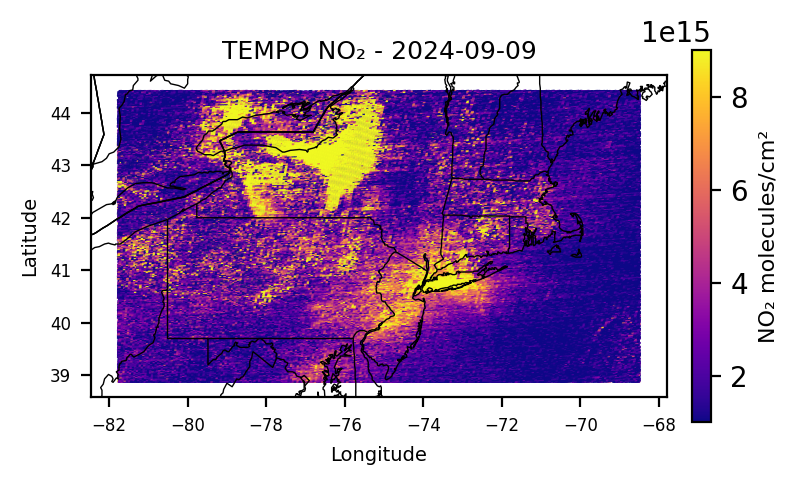

In [30]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import polygons
import pyrsig
import pycno
import matplotlib.animation as animation
import pandas as pd


coordkeys = [
    'Longitude_SW', 'Latitude_SW',
    'Longitude_SE', 'Latitude_SE',
    'Longitude_NE', 'Latitude_NE',
    'Longitude_NW', 'Latitude_NW',
    'Longitude_SW', 'Latitude_SW',
]

cno = pycno.cno()


bbox = (-81.77, 38.87, -68.49, 44.42)
datakey = "tempo.l2.no2.vertical_column_troposphere"
dates = pd.date_range("2024-09-09", "2024-09-15")
col = 'no2_vertical_column_troposphere'
vmin = 1e15
vmax = 9e15
cno = pycno.cno()

# preload shapefiles
geo_dfs = []
for date in dates:
    api = pyrsig.RsigApi(bbox=bbox)
    tkey = 'none'
    api.tempo_kw['api_key'] = tkey
    tempodf2 = api.to_dataframe(datakey, bdate=date.strftime('%Y-%m-%d'), unit_keys=False, parse_dates=True,
                                verbose=9, backend='xdr')
    geom = polygons(tempodf2[coordkeys].values.reshape(-1, 5, 2))
    gdf = gpd.GeoDataFrame(tempodf2.drop(columns=coordkeys), geometry=geom, crs=4326)
    geo_dfs.append((date.strftime('%Y-%m-%d'), gdf))

# plot
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin, vmax))
cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label("NO₂ molecules/cm²", fontsize=8)

# make gif
def update(frame):
    ax.clear()
    date_str, gdf = geo_dfs[frame]
    gdf.plot(
        col, cmap='plasma', edgecolor="face", linewidth=0.1,
        ax=ax, vmin=vmin, vmax=vmax
    )
    cno.drawstates(ax=ax, resnum=1)
    ax.set_title(f"TEMPO NO₂ - {date_str}", fontsize=9)
    ax.set_xlabel("Longitude", fontsize=7)
    ax.set_ylabel("Latitude", fontsize=7)
    ax.tick_params(labelsize=6)

ani = animation.FuncAnimation(fig, update, frames=len(geo_dfs), repeat=True)
ani.save("tempo_timelapse.gif", writer="pillow", fps=1)


In [31]:
from google.colab import files
files.download("tempo_timelapse.gif")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## TEMPO: 4km Grid over CONUS but only downloaded data for specified regional area.

In [32]:
import matplotlib.pyplot as plt
import pyrsig
import pandas as pd
import xarray as xr
import pycno
import os


gdnam = '4US1'
bdate = '2024-09-01'
edate = '2024-09-30'
wdir = f'{gdnam}/{bdate[:4]}'

os.makedirs(gdnam, exist_ok=True)


# tempo NO2 range
bdates = pd.date_range('2024-09-01', '2024-09-30')

rsigapi = pyrsig.RsigApi(
  bbox=(-81.77,38.87,-68.49,44.42), workdir='boston', encoding={"zlib": True, "complevel": 1, "_FillValue": -9.999e36},
  grid_kw=gdnam
)

# Loop over days
tkey = 'none'
rsigapi.tempo_kw['api_key'] = tkey
# Update to download daily averages instead of hourly
rsigapi.grid_kw['REGRID_AGGREGATE'] = 'daily'
dss = []
for bdate in bdates:
    print(bdate)
    edate = bdate + pd.to_timedelta('86388s')
    try:
        ds = rsigapi.to_ioapi(key='tempo.l2.no2.vertical_column_troposphere', bdate=bdate, edate=edate,
                           verbose=9)
               # ds = rsigapi.to_dataframe(
    #'tempo.l2.no2.vertical_column_troposphere', bdate=bdate, edate=edate,
   # unit_keys=False, parse_dates=True, verbose=9
 # )
        dss.append(ds)
    except Exception as e:
        print(e)
# tempodf = pd.concat(dss)


2024-09-01 00:00:00
https://ofmpub.epa.gov/rsig/rsigserver?SERVICE=wcs&VERSION=1.0.0&REQUEST=GetCoverage&FORMAT=netcdf-ioapi&TIME=2024-09-01T00:00:00Z/2024-09-01T23:59:48Z&BBOX=-81.77,38.87,-68.49,44.42&COVERAGE=tempo.l2.no2.vertical_column_troposphere&COMPRESS=1&MAXIMUM_CLOUD_FRACTION=1.0&MINIMUM_QUALITY=normal&KEY=none&MAXIMUM_SOLAR_ZENITH_ANGLE=70.0&REGRID=weighted&LAMBERT=33.0,45.0,-97.0,40.0&ELLIPSOID=6370000.0,6370000.0&GRID=1377,897,-2556000.0,-1728000.0,4000.0,4000.0&REGRID_AGGREGATE=daily&CORNERS=1
Calling RSIG boston/tempo.l2.no2.vertical_column_troposphere_2024-09-01T000000Z_2024-09-01T235948Z.nc.gz 
Retrieving ...........
2024-09-02 00:00:00
https://ofmpub.epa.gov/rsig/rsigserver?SERVICE=wcs&VERSION=1.0.0&REQUEST=GetCoverage&FORMAT=netcdf-ioapi&TIME=2024-09-02T00:00:00Z/2024-09-02T23:59:48Z&BBOX=-81.77,38.87,-68.49,44.42&COVERAGE=tempo.l2.no2.vertical_column_troposphere&COMPRESS=1&MAXIMUM_CLOUD_FRACTION=1.0&MINIMUM_QUALITY=normal&KEY=none&MAXIMUM_SOLAR_ZENITH_ANGLE=70.0&REG

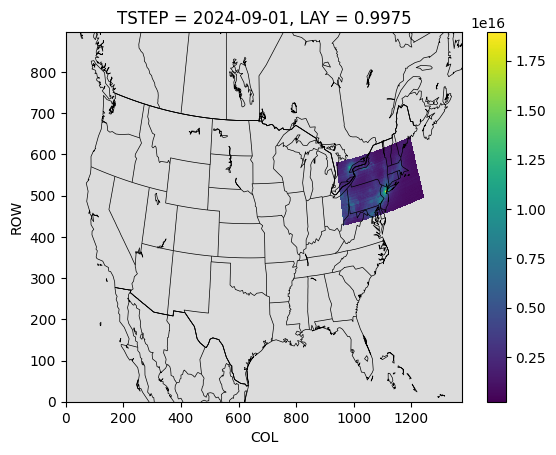

In [33]:
# print(dss[0])



# Initialize from the first day
outds = dss[0][['DAILY_NO2_VERTI', 'COUNT']].isel(TSTEP=0, LAY=0)
outds['DAILY_NO2_VERTI'] = outds['DAILY_NO2_VERTI'].fillna(0) * outds['COUNT']

# Loop through remaining days
for ds in dss[1:]:
    ds = ds.isel(TSTEP=0, LAY=0)
    outds['DAILY_NO2_VERTI'] += ds['DAILY_NO2_VERTI'].fillna(0) * ds['COUNT']
    outds['COUNT'] += ds['COUNT']

# Final average
Z = outds['DAILY_NO2_VERTI'] = outds['DAILY_NO2_VERTI'] / outds['COUNT']

# Make a plot with a medium grey background and state boundaries
qm = Z.plot()
qm.axes.set(facecolor='gainsboro')
pycno.cno(dss[0].attrs['crs_proj4']).drawstates(ax=qm.axes)

# Show the figure
plt.show()
# Or save the figure

https://ofmpub.epa.gov/rsig/rsigserver?SERVICE=wcs&VERSION=1.0.0&REQUEST=GetCoverage&FORMAT=xdr&TIME=2024-09-09T00:00:00Z/2024-09-09T23:59:59Z&BBOX=-81.77,38.87,-68.49,44.42&COVERAGE=tempo.l2.no2.vertical_column_troposphere&COMPRESS=1&MAXIMUM_CLOUD_FRACTION=1.0&MINIMUM_QUALITY=normal&KEY=none&MAXIMUM_SOLAR_ZENITH_ANGLE=70.0&CORNERS=1
Using cached: ./tempo.l2.no2.vertical_column_troposphere_2024-09-09T000000Z_2024-09-09T235959Z.xdr.gz


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 2118354119209772.75 of field no2_trop of feature 462587 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 1661221774357566.5 of field no2_trop of feature 462588 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 1195761681518084.25 of field no2_trop of feature 462589 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 2488653915768355 of field no2_trop of feature 462590 not successfully written. Possibly due to too larger number with respect to field width
  ogr_writ

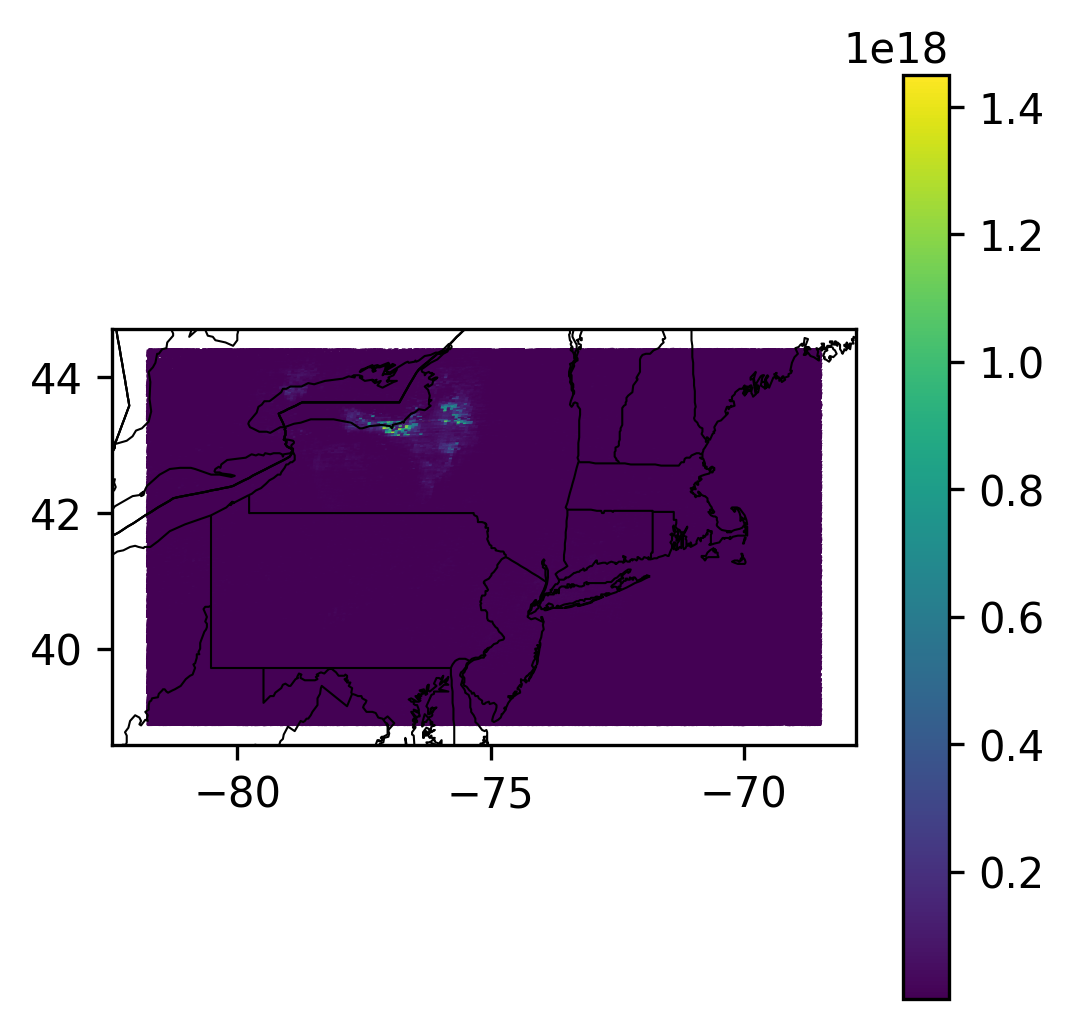

In [34]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import polygons
import pyrsig
import pycno
import pandas as pd


coordkeys = [
    'Longitude_SW', 'Latitude_SW',
    'Longitude_SE', 'Latitude_SE',
    'Longitude_NE', 'Latitude_NE',
    'Longitude_NW', 'Latitude_NW',
    'Longitude_SW', 'Latitude_SW',
]

cno = pycno.cno()



# get tempo NO2
datakey = "tempo.l2.no2.vertical_column_troposphere"
# bdate = ('2024-09-09T00')
bdate = pd.to_datetime("2024-09-09")
edate = bdate + pd.to_timedelta("86399s")
rsigapi = pyrsig.RsigApi(
  bbox=(-81.77,38.87,-68.49,44.42))
tkey = 'none'
rsigapi.tempo_kw['api_key'] = tkey
tempodf = rsigapi.to_dataframe(
    'tempo.l2.no2.vertical_column_troposphere', bdate=bdate, edate=edate,
     unit_keys=False, parse_dates=True, verbose=9, backend='xdr')

# create geodataframe
geom = polygons(tempodf[coordkeys].values.reshape(-1, 5, 2))
gtempodf = gpd.GeoDataFrame(
    tempodf.drop(columns=coordkeys), geometry=geom, crs=4326
)

# # Make Plot
# col = 'nitrogendioxide_tropospheric_column(molecules/cm2)'
col = 'no2_vertical_column_troposphere'
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
gtempodf.plot(col, edgecolor="face", linewidth=0.1, legend=True, ax=ax)
cno.drawstates(ax=ax, resnum=1)
fig.savefig(f'{datakey}_{bdate}.png')

# save as gis format
gtempodf.to_file(f'{datakey}_{bdate}.geojson')
gtempodf.rename(columns={
    'Timestamp': 'time_utc',
    'LATITUDE': 'lat_center',
    'LONGITUDE': 'lon_center',
    col: 'no2_trop',
}).to_file(f'{datakey}_{bdate}.shp')

In [35]:
gtempodf

Timestamp  LONGITUDE   LATITUDE  \
0     2024-09-09T12:32:00+0000 -72.139336  44.414963   
1     2024-09-09T12:32:00+0000 -72.339104  44.407440   
2     2024-09-09T12:32:00+0000 -71.410263  44.419128   
3     2024-09-09T12:32:00+0000 -71.608734  44.417316   
4     2024-09-09T12:32:00+0000 -71.676918  44.414333   
...                        ...        ...        ...   
1766  2024-09-09T21:25:00+0000 -81.755318  39.044155   
1767  2024-09-09T21:25:00+0000 -81.758156  39.024544   
1768  2024-09-09T21:25:00+0000 -81.761093  39.004642   
1769  2024-09-09T21:25:00+0000 -81.764053  38.984669   
1770  2024-09-09T21:25:00+0000 -81.767021  38.964661   

      no2_vertical_column_troposphere                      time  \
0                        5.420436e+14 2024-09-09 12:32:00+00:00   
1                        4.074186e+14 2024-09-09 12:32:00+00:00   
2                        2.718538e+15 2024-09-09 12:32:00+00:00   
3                        2.383554e+15 2024-09-09 12:32:00+00:00   
4                        3.048453e+15 2024-09-09 12:32:00+00:00   
...                               ...                       ...   
1766                     2.792154e+15 2024-09-09 21:25:00+00:00   
1767                     4.516842e+15 2024-09-09 21:25:00+00:00   
1768                     1.517978e+15 2024-09-09 21:25:00+00:00   
1769                     1.956248e+15 2024-09-09 21:25:00+00:00   
1770                     2.261518e+15 2024-09-09 21:25:00+00:00   

                                               geometry  
0     POLYGON ((-72.10015 44.42917, -72.16926 44.424...  
1     POLYGON ((-72.30259 44.41886, -72.36773 44.418...  
2     POLYGON ((-71.3712 44.43411, -71.43782 44.4318...  
3     POLYGON ((-71.57043 44.43038, -71.6382 44.4275...  
4     POLYGON ((-71.6382 44.42756, -71.70582 44.4243...  
...                                                 ...  
1766  POLYGON ((-81.72533 39.05465, -81.78238 39.053...  
1767  POLYGON ((-81.72816 39.03512, -81.78532 39.033...  
1768  POLYGON ((-81.73101 39.0155, -81.78824 39.0136...  
1769  POLYGON ((-81.73396 38.99557, -81.79119 38.993...  
1770  POLYGON ((-81.73696 38.97551, -81.79412 38.973...  

[465087 rows x 6 columns]

In [36]:
import os
os.remove('tempo.l2.no2.vertical_column_troposphere_2024-09-09T000000Z_2024-09-09T235959Z.xdr.gz')

In [37]:
print(gtempodf['no2_vertical_column_troposphere'].describe())

count    4.650870e+05
mean     3.846328e+15
std      1.604130e+16
min      9.228274e+10
25%      1.284051e+15
50%      2.288194e+15
75%      3.959672e+15
max      1.449671e+18
Name: no2_vertical_column_troposphere, dtype: float64
